# Fit de una función:

Cuando se hace física experimental o física computacional, los resultados que uno suele obtener no son exactos, aunque muchas veces uno puede "adivinar" el tipo de función que uno obtiene. Esto es lo que coloquialmente conocemos como cuchareo, y formalmente se dice que son "argumentos heurísticos".

Pero cuando uno adivina el tipo de función dice cosas como "es una ley de potencias", lo cual es equivalente a decir, $f(x) = a \cdot x^b$ donde $a$ y $b$ son parámetros. ¿Qué valores tienen $a$ y $b$? 

Por ejemplo, si tomamos los datos de wikipedia, el número de muertos por guerra durante los últimos miles de años, nos da una lista ordenada de número de muertos. Estos los pongo en "Wars". No puse toda la lista, pero bastantes. 

Ahora bien, si estos datos están ordenados de mayor a menor (que es el caso), podemos graficar el número de muertos vs el rango en el que se encuentra esa guerra. Esto se ve así: 

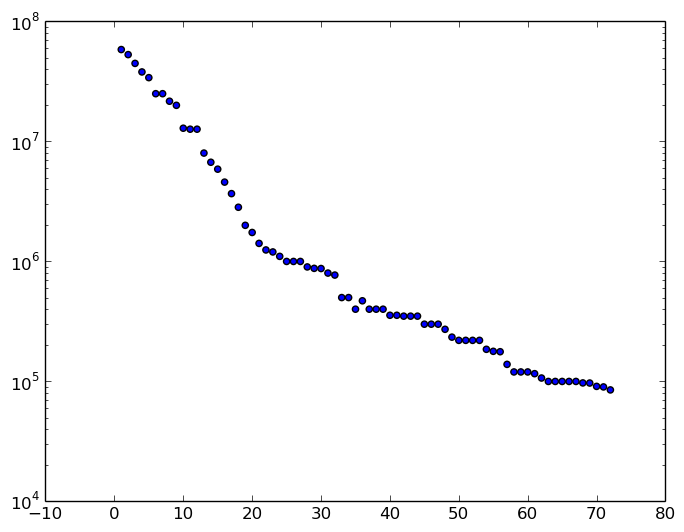

In [32]:
using PyPlot
Wars = [58309519; 52915026; 44721360; 37947332; 34016173; 25000000; 25000000; 21633308; 20000000]
append!(Wars,[12890306; 12649111; 12649111; 8000000; 6708204; 5873670; 4582576; 3674235; 2828427])
append!(Wars,[2000000; 1743560; 1414214; 1246790; 1200000; 1102361; 1000000; 1000000; 1000000; 900000])
append!(Wars,[876000; 873000; 800000; 770000; 500000; 500000; 400000; 470000; 400000; 400000]) 
append!(Wars,[400000; 356000; 356000; 350000; 350000; 350000])
append!(Wars,[300000; 300000; 300000; 272000; 234000; 220000; 220000; 220000; 220000; 185250])
append!(Wars,[178258; 176913; 138800; 120000; 120000; 120000])
append!(Wars,[116074; 106800; 100000; 100000; 100000; 100000; 100000; 97214; 97000; 90969; 90000; 85000])
rank = Float64[]
for i in 1:length(Wars)
    push!(rank, i)
end
scatter(rank, Wars)
yscale("log")

Ahora bien, nos gustaría ajustar esta función con por ejemplo, una exponencial: 

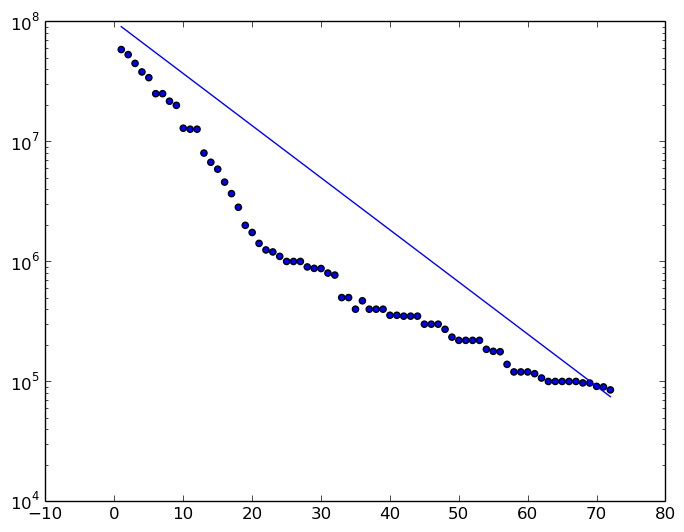

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4949d7db50>

In [33]:
scatter(rank, Wars)
yscale("log")
plot(rank, 100000000exp(-0.1rank))

Los valores que puse multiplicando a la exponencial fueron totalmente arbitrarios. Ajustar estos puntos a la exponencial $a \cdot e^{bx}$ significa encontrar los mejores $a$ y $b$ que aproximen lo mejor posible la función exponencial a los datos. Esto lo podemos hacer con técnicas de interpolación (como mínimos cuadrados), o bien, con un paquete adecuado. LsqFit, es el paquete que nos servirá para este propósito. 

Para instalarlo, como siempre, usa Pkg.add("LsqFit"). Después, para empezar a usarlo, necesitarás poner (como siempre) using LsqFit. 

Para ajustar una curva a un modelo "modelo(x,p)", donde x son los valores que adquirirá la función, y p son los parámetros, usamos la función "curve_fit", que toma como argumentos, el modelo, los valores en x, los valores en y y los parámetros. 

Como resultado dará una serie de datos. El que nos interesa es el segundo dato, compuesto por un arreglo. Ese arreglo son los parámetros ajustados. 

In [34]:
using LsqFit
modelo(x,p) = p[1].*exp(p[2].*x)
fit = curve_fit(modelo, rank, Wars, [0.5, -0.5])

LsqFit.LsqFitResult{Float64}(70,[7.09740173078342e7,-0.15796983051002908],[2.29346e6,-1.16763e6,-5.3552e5,-2.18124e5,-1.80013e6,2.5085e6,-1.51117e6,-1.57677e6,-2.87421e6,1.73299e6  …  -96619.7,-97113.6,-97535.4,-97895.5,-98203.1,-95679.6,-95689.8,-89850.3,-89044.8,-84184.3],72x2 Array{Float64,2}:
 0.853876         6.0603e7 
 0.729103         1.03495e8
 0.622564         1.32558e8
 0.531592         1.50917e8
 0.453913         1.6108e8 
 0.387585         1.65051e8
 0.33095          1.64422e8
 0.28259          1.60452e8
 0.241297         1.54132e8
 0.206037         1.46233e8
 0.17593          1.37351e8
 0.150222         1.27943e8
 0.128271         1.18351e8
 ⋮                         
 6.53234e-5       2.82812e5
 5.57781e-5       2.45445e5
 4.76275e-5  212960.0      
 4.0668e-5        1.84728e5
 3.47254e-5       1.60199e5
 2.96512e-5       1.38895e5
 2.53184e-5       1.20396e5
 2.16188e-5       1.04337e5
 1.84597e-5   90401.2      
 1.57623e-5   78310.1      
 1.34591e-5   67822.3      
 1

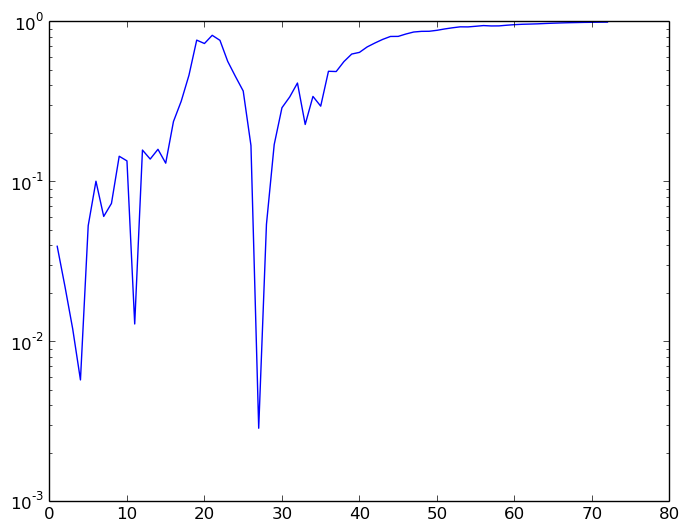

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4949616650>

In [35]:
modelo(x,p) = p[1].*exp(p[2].*x)
yscale("log")
plot(rank, abs(Wars.-modelo(rank,[7.09740173078342e7,-0.15796983051002908]))./Wars)

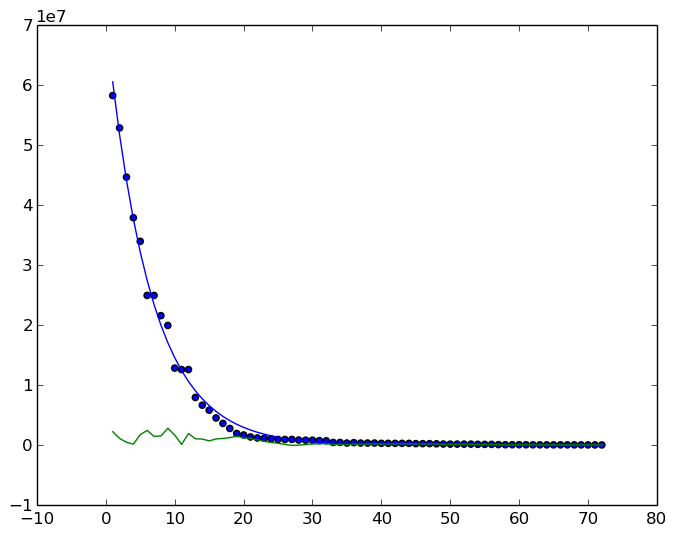

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4949d856d0>

In [36]:
scatter(rank, Wars)
modelo(x,p) = p[1].*exp(p[2].*x)
plot(rank, modelo(rank,[7.09740173078342e7,-0.15796983051002908]))
plot(rank, abs(Wars.-modelo(rank,[7.09740173078342e7,-0.15796983051002908])))

Como vemos, obtiene un buen valor de parámetros. El número de muertos por "rank", es más o menos $7.09740173078342e7 e^{-0.15796983051002908x}$. Pero, ¿Qué tanto error tiene este ajuste? 

Para saberlo usamos la función "estimate_errors(fit, confidence)". Toma como argumentos el fit hecho, y un rango de confidencialidad (regularmente 0.95). El resultado es la desviación estandar de cada parámetro. 

In [37]:
errors = estimate_errors(fit, 0.95)

2-element Array{Float64,1}:
 1.35228e6 
 0.00392519

Así por ejemplo, si consideramos que una guerra se da cuando hay almenos 1 muerto, nuestra estimación diría que en la historia de la humanidad ha habido entre 112 y 118 guerras. Por supuesto falla. Ha habido poco más de 130, pero no está tan equivocado, considerando que sólo puse los datos de las 72 guerras más atroces, los datos no son tan precisos y una exponencial quizá no es lo que mejor ajusta.